In [80]:
#Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
X_train,Y_train=loadlocal_mnist(images_path='train-images-idx3-ubyte',labels_path='train-labels-idx1-ubyte')
X_test,Y_test=loadlocal_mnist(images_path='t10k-images-idx3-ubyte',labels_path='t10k-labels-idx1-ubyte')

print(y_train.shape)

(10, 60000)


In [81]:
#Preprocessing
n_class=10
def preprocessing():
    
    x_train =X_train- X_train/255
    x_train = StandardScaler().fit_transform(x_train)
    x_test =X_test-X_test/255
    x_test = StandardScaler().fit_transform(x_test)
    y_train = np.eye(n_class)[Y_train.astype('int32')]
    y_train = y_train.T.reshape(n_class, len(Y_train))
    y_test = np.eye(n_class)[Y_test.astype('int32')]
    y_test = y_test.T.reshape(n_class, len(Y_test))
    x_train = x_train.T.reshape(784, len(x_train))
    x_test = x_test.T.reshape(784, len(x_test))
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=preprocessing()


In [82]:
#Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Cross Entropy Loss
def crossentropyloss(Y, predicted):
    Loss_sum = np.sum(np.multiply(Y, np.log(predicted)))
    m = Y.shape[1]
    Loss_S = -(1/m) * Loss_sum
    return Loss_S


In [76]:
#Forward_&_Backward Propogation
def fit_model(x_train,y_train,n_iteration,alpha):
    n_input = x_train.shape[0]
    n_hidden = 150
    len_input = len(x_train)
    learning_rate = alpha
    
    #Random initialization of weight and bias for Layer1 
    w1 = np.random.randn(n_hidden, n_input)
    b1 = np.zeros((n_hidden, 1))
    
    #Random initialization of weight and bias for Layer2
    w2 = np.random.randn(n_class, n_hidden)
    b2 = np.zeros((n_class, 1))

    X = x_train
    Y = y_train
    n_iter=n_iteration
    costarr=np.empty([n_iter, 1])
    iterations=list(np.arange(1,n_iter+1))

    for i in range(n_iter):
        #Forward_Propogation for Layer1
        #print(w1.shape)
        #print(X.shape)
        #print(b1.shape)
        z1 = np.matmul(w1,X) + b1
        a1 = sigmoid(z1)          #Sigmoid Function
        
    
        #Forward Propogation for Layer2
        #print(w2.shape)
        #print(a1.shape)
        #print(b2.shape)
        z2 = np.matmul(w2,a1) + b2
        a2 = np.exp(z2) / np.sum(np.exp(z2), axis=0) #Softmax Function 
        
        
        #Cost at each Itteration
        cross_entropy_cost = crossentropyloss(Y, a2)
        costarr[i]=cross_entropy_cost
        
        #Backward Propogation
        #Error for layer 2
        dz2 = a2-Y
        
        #Error for layer 1
        da1 = np.matmul(w2.T, dz2)
        dz1 = da1 * sigmoid(z1) * (1 - sigmoid(z1))
        
        #Update for layer 2
        w2 = w2 - learning_rate * ((1./len_input) * np.matmul(dz2, a1.T))
        b2 = b2 - learning_rate * ((1./len_input) * np.sum(dz2, axis=1, keepdims=True))
        
        #Update for layer1
        w1 = w1 - learning_rate * ((1./len_input) * np.matmul(dz1, X.T))
        b1 = b1 - learning_rate * ((1./len_input) * np.sum(dz1, axis=1, keepdims=True))
    return w1,b1,w2,b2,costarr,iterations


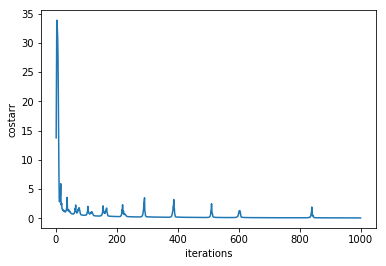

In [77]:
w1,b1,w2,b2,costarr,iterations=fit_model(x_train,y_train,1000,0.1)

def plotcost(costarr,iterations):
    plt.xlabel("iterations")
    plt.ylabel("costarr")
    plt.plot(iterations,costarr)
    plt.show()
plotcost(costarr,iterations)

In [78]:
def pred_train(w1,b1,w2,b2,x_train,y_train):
    z1_t = np.matmul(w1, x_train) + b1
    a1_t = sigmoid(z1_t)
    z2_t = np.matmul(w2, a1_t) + b2
    a2_t = np.exp(z2_t) / np.sum(np.exp(z2_t), axis=0)

    predictions = np.argmax(a2_t, axis=0)
    labels = np.argmax(y_train, axis=0)
    accuracy = accuracy_score(labels,predictions)
    return accuracy
print(pred_train(w1,b1,w2,b2,x_train,y_train))
    


0.9858833333333333


In [83]:
def pred_test(w1,b1,w2,b2,x_test,y_test):
    #Forward Propogation for Layer 1 on Test set
    z1_test = np.matmul(w1, x_test) + b1
    a1_test = sigmoid(z1_test)
    
    #Forward Propogation for Layer 2 on Test set
    z2_test = np.matmul(w2, a1_test) + b2
    a2_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=0)

    #Predictions on test set
    predictions = np.argmax(a2_test, axis=0)
    labels = np.argmax(y_test, axis=0)
    
    #Accuracy Measures for Test Set Predictions
    accuracy = accuracy_score(labels,predictions)
    confusion_matrix_val=confusion_matrix(predictions, labels)
    classification_report_val=classification_report(predictions, labels)
    return accuracy,confusion_matrix_val,classification_report_val

accuracy,confusion_matrix,classification_report=pred_test(w1,b1,w2,b2,x_test,y_test)
print("Test accuracy:",accuracy)
print("confusion_matrix:",confusion_matrix)
print("classification_report:", classification_report)


Test accuracy: 0.9038
confusion_matrix: [[ 931    0   11    2    1    9   15    4    7   10]
 [   0 1105   11    4    3    6    5    7    4   11]
 [   5    5  911   27   11    7   13   24   15    2]
 [   1    2   25  903    1   32    1   13   25   14]
 [   2    0   11    2  900    9   15    4   11   32]
 [  22    1    4   39    2  772   22    6   41    6]
 [  14    4   15    1   18   13  880    0   14    2]
 [   1    2   15    9    6    8    0  923    9   48]
 [   3   15   23   15    9   28    5    3  838    9]
 [   1    1    6    8   31    8    2   44   10  875]]
classification_report:               precision    recall  f1-score   support

           0       0.95      0.94      0.95       990
           1       0.97      0.96      0.96      1156
           2       0.88      0.89      0.89      1020
           3       0.89      0.89      0.89      1017
           4       0.92      0.91      0.91       986
           5       0.87      0.84      0.85       915
           6       0.92    